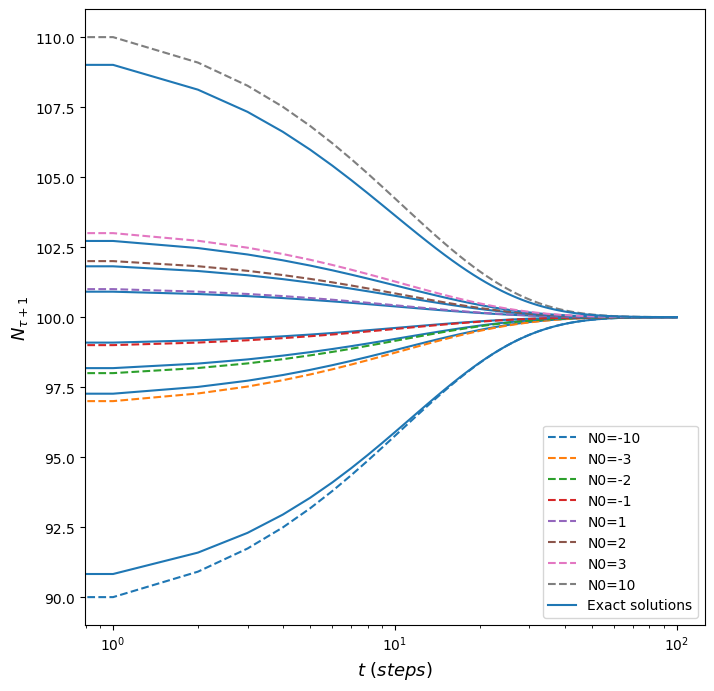

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from ddeint import ddeint
import sys
import matplotlib
# matplotlib.use('qtSagg')

T = 100
K = 10**3
r = 0.1
b = 1
eig_1 = 1-b*r/(1+r)
# eig_2 = 1+r
N_star = K*r**(1/b)
delta_N0 = np.array([-10, -3, -2, -1, 1, 2, 3, 10])
# delta_N0 = 10
N0 = N_star + delta_N0
N = N0
N_list = [N0]
N1 = [N0]
N_star_list = [0]

fig, ax = plt.subplots(figsize=(8,8))

for delta_N0_i in delta_N0:

    N0 = N_star + delta_N0_i
    N = N0
    N_list = [N0]
    N1 = [N0]

    for t in range(T):

        if delta_N0_i != 10:
            N_next = (r+1)*N / (1+(N/K)**b)
            N = N_next
            N_list.append(N)

        N1_next = delta_N0_i*eig_1**t + N_star
        N1.append(N1_next)

        N_star_list.append(t+1)
    
    ax.plot(N_list, '-', lw=1.5, color='tab:blue')
    ax.plot(N1, '--', lw=1.5, label='N0={}'.format(delta_N0_i))

N0 = N_star + 10
for t in range(T):
    N_next = (r+1)*N / (1+(N/K)**b)
    N = N_next
    N_list.append(N)

ax.plot(N_list, '-', lw=1.5, color='tab:blue', label='Exact solutions')

# for i in range(len(N_list)-1):
#     ax.plot(N_list,lw=1, color='tab:blue')
#     ax.plot(N1[i,:], '--', lw=1, label='$\delta N_0 = {}$'.format(delta_N0[i]))


# ax.plot(N_list, '-', lw=1, color='tab:blue', label='Exact solution')
# ax.plot(N1, '--', lw=1, label='N0={}'.format(delta_N0[0]))

# ax.plot(N_star_list, '--', color='black', label='$N^{*}$ ($Kr^{1/b}$)')
ax.set_xlabel('$t$ $(steps)$', fontsize=13)
ax.set_ylabel(r'$N_{\tau+1}$', fontsize=13)
ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_ylim([0,105])
ax.legend(loc='lower right', prop={'size': 10})
title = '/1.2f'
location = r'C:\Users\erikn\OneDrive - Chalmers\Computational Biology\CB HW 1'
plt.savefig(location+title+'.png')
plt.show()